In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, special, stats

https://stackoverflow.com/questions/78666793/how-can-i-create-a-custom-sigmoid-function

In [2]:
ydata = [0, 0.1, 0.9, 1]
xdata = [0, 0.22, 1.34, 5]
p0 = [np.median(xdata), 1.]
sigma=[0.1, 0.01, 0.01, 100]

In [4]:
def model1(x, k, x0):
    return special.expit(k * (x - x0))

In [5]:
popt1, pcov1 = optimize.curve_fit(model1, xdata, ydata, p0=p0, sigma=sigma)
popt1, pcov1

(array([3.92654466, 0.78030023]),
 array([[ 1.96699473e-03, -6.06529950e-08],
        [-6.06529950e-08,  4.00512976e-05]]))

In [6]:
def model2(x, c, loc):
    return stats.invweibull(c=c, loc=loc).cdf(x)

In [16]:
popt2, pcov2 = optimize.curve_fit(model2, xdata, ydata, p0=p0, sigma=sigma)
popt2, pcov2

(array([ 3.48553148, -0.56719092]),
 array([[ 5.55770539e-07, -2.36780571e-08],
        [-2.36780571e-08,  3.52525995e-09]]))

In [8]:
def model3(x, s, loc):
    return stats.lognorm(s=s, loc=loc).cdf(x)

In [9]:
popt3, pcov3 = optimize.curve_fit(model3, xdata, ydata, p0=p0, sigma=sigma)
popt3, pcov3

(array([ 0.41684656, -0.36610887]),
 array([[6.75034758e-07, 2.97814982e-07],
        [2.97814982e-07, 6.81355466e-07]]))

In [10]:
xlin = np.linspace(0, 5, 200)

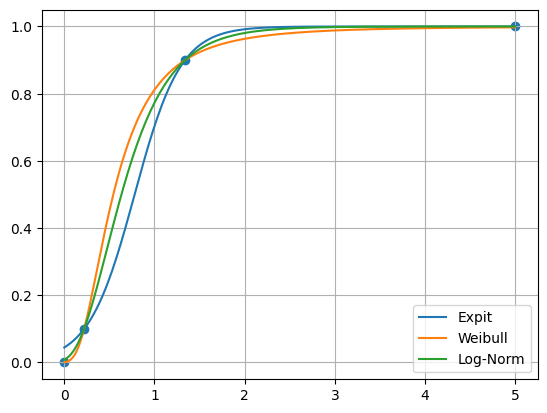

In [14]:
fig, axe = plt.subplots()
axe.scatter(xdata, ydata)
axe.plot(xlin, model1(xlin, *popt1), label="Expit")
axe.plot(xlin, model2(xlin, *popt2), label="Weibull")
axe.plot(xlin, model3(xlin, *popt3), label="Log-Norm")
#axe.set_ylim([-0.05, 1.05])
axe.legend()
axe.grid()

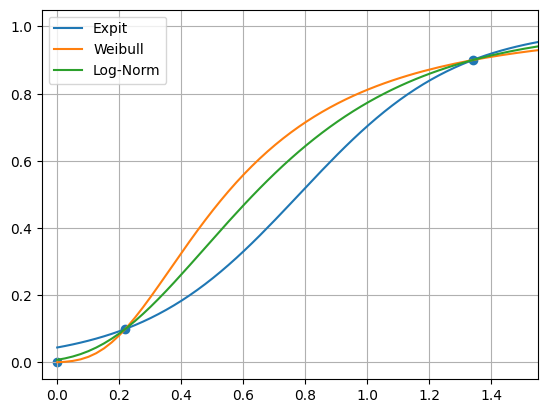

In [15]:
fig, axe = plt.subplots()
axe.scatter(xdata, ydata)
axe.plot(xlin, model1(xlin, *popt1), label="Expit")
axe.plot(xlin, model2(xlin, *popt2), label="Weibull")
axe.plot(xlin, model3(xlin, *popt3), label="Log-Norm")
axe.set_xlim([-0.05, 1.55])
#axe.set_ylim([-0.05, 1.05])
axe.legend()
axe.grid()